***

<center><u><H1>Regressione</H1></u></center>

***

***
# 1 Regressione lineare semplice

L'obiettivo della regressione lineare è approssimare un modello lineare per descrivere la relazione tra variabile dipendente e almeno una variabile indipendente. E' un modello molto utile per valutare:
- la relazione tra le variabili
- la forza di tale relazione e la direzione della correlazione

Implementiamo ora un modello di regressione lineare semplice. Come abbiamo visto, l'obiettivo è quello di trovare i parametri della retta di regressione:

$\widehat{y} = \beta_0 + \beta_1 x_1$

I parametri ottimi sono quelli che minimizzano l'equazione MSE:

$MSE = \frac{1}{N}\sum_{i=1}^N {\left(y_i-\widehat{y}\right)}^2$

***


## 1.1 Importazione di moduli e dataset

Per comprendere il concetto della regressione lineare semplice, iniziamo con un dataset piuttosto semplificato.

In [1]:
import pandas as pd  # dataframe
import seaborn as sns  # grafica
import matplotlib.pyplot as plt  # grafica
import math
from sklearn.model_selection import train_test_split  # training/test set split
from sklearn.linear_model import LinearRegression  # regressione lineare
from sklearn.metrics import mean_squared_error  # metriche
from sklearn.metrics import mean_absolute_error  # metriche
from sklearn.metrics import r2_score  # metriche

sns.set_style("whitegrid")
sns.set_palette("pastel")

df = pd.read_csv("00_datasets/salary_data.csv")

## 1.2 Analisi del dataset

### 1.2.1 Caratteristiche delle feature

Valutiamo le caratteristiche di questo dataset tramite i metodi info() e describe(), oltre a stampare dati sulle dimensioni e i tipi di dato:

In [2]:
print("Sono presenti {} osservazioni con {} feature.".format(df.shape[0], df.shape[1]-1))  # -1 perché una è la DV da predire

Sono presenti 30 osservazioni con 1 feature.


In [3]:
print(df.dtypes)

YearsExperience    float64
Salary             float64
dtype: object


In [4]:
df.describe()

YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


### 1.2.2 Data pre-processing

Per questa analisi, possiamo limitarci alla gestione dei dati mancanti e ad osservare se vi sono degli outlier:
- nel dataset ridotto che stiamo considerando, abbiamo solo variabili numeriche per cui non vi è necessità di conversione da un tipo di dato categorico;
- fino a che consideriamo una regressione lineare semplice, possiamo evitare di scalare la variabile indipendente;
- a volte, anche nella regressione multi-lineare è possibile evitare lo scaling, perché in generale i risultati non sono particolarmente diversi.

In [2]:
missing_data = df.isnull()

for col in missing_data.columns:
    count = sum(missing_data[col])
    if count > 0:
        print(f"{col}: {count/missing_data.shape[0]:.2%} ({count} su {missing_data.shape[0]}) mancanti.")

Non ci sono dati mancanti. Valutiamo gli outlier graficamente:

<Axes: ylabel='YearsExperience'>

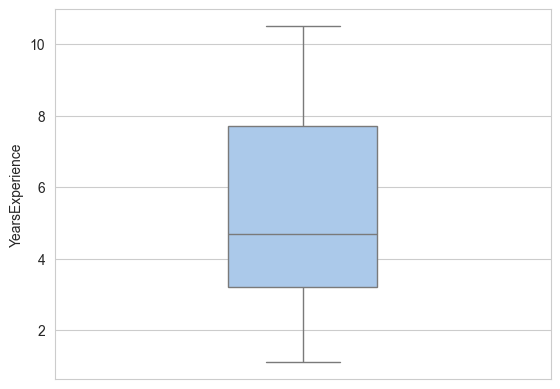

In [7]:
sns.boxplot(y="YearsExperience", data=df, width=0.3)

<Axes: ylabel='Salary'>

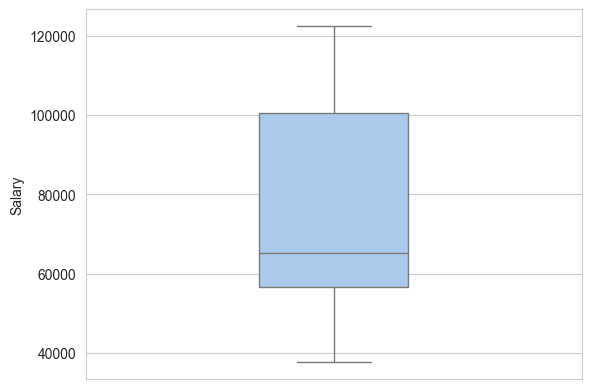

In [8]:
sns.boxplot(y="Salary", data=df, width=0.3)

Su nessuna delle variabili sono presenti degli outlier. Da notare comunque che abbiamo mostrato il box plot della DV per avere una idea della sua distribuzione; se vi fossero stati degli outlier, prima di eliminarli avremmo dovuto essere estremamente sicuri dell'operazione in quanto l'impatto sull'accuratezza della predizione potrebbe essere molto pesante.

## 1.3 Train/test split

Per semplcità, consideriamo uno split con metodo holdout al 20%:

In [3]:
# separiamo IV e DV
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# applichiamo lo split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## 1.4 Feature scaling

Nella regressione lineare, solitamente non si applica per due motivi:
- i risultati non vengono impattati in modo significativo;
- uno dei risultati della regressione è proprio avere l'indicazione di come le IV impattano sulla DV, informazione che si perderebbe con uno scaling.

## 1.5 Regressione lineare semplice

Per questo algoritmo, si deve semplicemente:
- creare un oggetto [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html);
- **allenarlo** sui dati del **training set** tramite la funzione fit();
- fare le **predizioni** sul **test set** tramite la funzione predict().

In [6]:
# creazione del regressore
regressor = LinearRegression()

# training
regressor.fit(X_train, y_train)

LinearRegression()

In [7]:
# predizioni sul test set
y_hat = regressor.predict(X_test)

Possiamo far stampare i dati della regressione lineare semplice:

In [12]:
print("Linear regression model: y = {}x + {}".format(regressor.coef_, regressor.intercept_))

Linear regression model: y = [9312.57512673]x + 26780.099150628157


## 1.6 Prestazioni del modello

Possiamo intanto valutare in modo visuale le prestazioni tramite le funzioni [regplot](https://matplotlib.org/stable/gallery/index.html) e [residplot](https://seaborn.pydata.org/generated/seaborn.residplot.html) di seaborn:

In [13]:
plt.figure(figsize=(6, 5))
sns.regplot(x="YearsExperience", y="Salary", data=df)
plt.ylim(0,)

(0.0, 134127.08121519658)

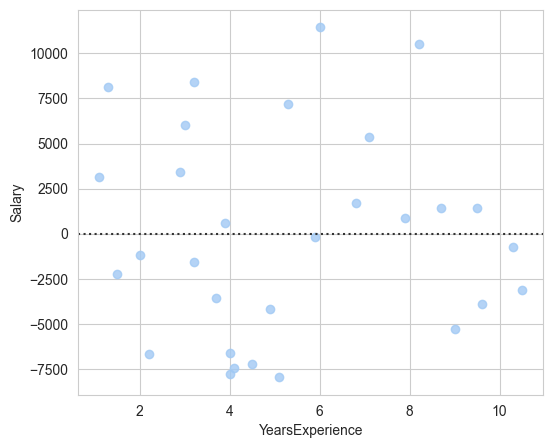

In [14]:
plt.figure(figsize=(6, 5))
sns.residplot(x=df['YearsExperience'], y=df['Salary'])
plt.show()

In termini di metriche, possiamo calcolare le seguenti:
- Mean Squared Error (MSE)

In [15]:
mse = mean_squared_error(y_test, y_hat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  12823412.298126506


- Root Mean Squared Error (RMSE)

In [16]:
print('The root mean square error of price and predicted value is: ', math.sqrt(mse))

The root mean square error of price and predicted value is:  3580.979237321337


- Mean Absolute Error (MAE)

In [17]:
mae = mean_absolute_error(y_test, y_hat)
print('The mean absolute error of price and predicted value is: ', mae)

The mean absolute error of price and predicted value is:  2446.172369046503


- $R^2$

In [18]:
print('The R-square is: ', regressor.score(X_test, y_test))
print('The R-square is: ', r2_score(y_test, y_hat))

The R-square is:  0.988169515729126
The R-square is:  0.988169515729126


Come possiamo vedere, è possibile calcolare il valore di $R^2$ tramite il metodo [score()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score) del regressore o tramite la funzione [r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) di sklearn.metrics. Naturalmente il risultato è il medesimo.

***
# 2 Regressione lineare semplice: dataset avanzato

Procediamo ora all'applicazione dei concetti visti ad un dataset più complesso, in modo che potremo anche introdurre la regressione lineare multipla. Il dataset è fuel_consumption.csv, fornito su Virtual Learning Environment e disponibile anche a [questo link](https://www.kaggle.com/sarita19/fuel-consumption):

In [19]:
df = pd.read_csv("00_datasets/fuel_consumption.csv")
df.head(5)

model_year   make       model vehicle_class  engine_size  cylinders  \
0        2014  ACURA         ILX       COMPACT          2.0          4   
1        2014  ACURA         ILX       COMPACT          2.4          4   
2        2014  ACURA  ILX HYBRID       COMPACT          1.5          4   
3        2014  ACURA     MDX 4WD   SUV - SMALL          3.5          6   
4        2014  ACURA     RDX AWD   SUV - SMALL          3.5          6   

  transmission fuel_type  fuel_consumption_city  fuel_consumption_hgw  \
0          AS5         Z                    9.9                   6.7   
1           M6         Z                   11.2                   7.7   
2          AV7         Z                    6.0                   5.8   
3          AS6         Z                   12.7                   9.1   
4          AS6         Z                   12.1                   8.7   

   fuel_consumption_comb  fuel_consumption_comb_mpg  co2_emissions  
0                    8.5                         33            196  
1                    9.6                         29            221  
2                    5.9                         48            136  
3                   11.1                         25            255  
4                   10.6                         27            244

In [20]:
print(df.dtypes)

model_year                     int64
make                          object
model                         object
vehicle_class                 object
engine_size                  float64
cylinders                      int64
transmission                  object
fuel_type                     object
fuel_consumption_city        float64
fuel_consumption_hgw         float64
fuel_consumption_comb        float64
fuel_consumption_comb_mpg      int64
co2_emissions                  int64
dtype: object


In [21]:
print("Sono presenti {} osservazioni con {} feature.".format(df.shape[0], df.shape[1]-1))

Sono presenti 1067 osservazioni con 12 feature.


In [22]:
df.describe()

model_year  engine_size    cylinders  fuel_consumption_city  \
count      1067.0  1067.000000  1067.000000            1067.000000   
mean       2014.0     3.346298     5.794752              13.296532   
std           0.0     1.415895     1.797447               4.101253   
min        2014.0     1.000000     3.000000               4.600000   
25%        2014.0     2.000000     4.000000              10.250000   
50%        2014.0     3.400000     6.000000              12.600000   
75%        2014.0     4.300000     8.000000              15.550000   
max        2014.0     8.400000    12.000000              30.200000   

       fuel_consumption_hgw  fuel_consumption_comb  fuel_consumption_comb_mpg  \
count           1067.000000            1067.000000                1067.000000   
mean               9.474602              11.580881                  26.441425   
std                2.794510               3.485595                   7.468702   
min                4.900000               4.700000                  11.000000   
25%                7.500000               9.000000                  21.000000   
50%                8.800000              10.900000                  26.000000   
75%               10.850000              13.350000                  31.000000   
max               20.500000              25.800000                  60.000000   

       co2_emissions  
count    1067.000000  
mean      256.228679  
std        63.372304  
min       108.000000  
25%       207.000000  
50%       251.000000  
75%       294.000000  
max       488.000000

In [23]:
df.describe(include='object').T

count unique       top freq
make           1067     39      FORD   90
model          1067    663  F150 FFV    8
vehicle_class  1067     16  MID-SIZE  178
transmission   1067     22        A6  222
fuel_type      1067      4         X  514

Per semplicità, selezioniamo un numero ridotto di feature:

In [24]:
df = df[['engine_size','cylinders','fuel_consumption_comb','co2_emissions']]
df

engine_size  cylinders  fuel_consumption_comb  co2_emissions
0             2.0          4                    8.5            196
1             2.4          4                    9.6            221
2             1.5          4                    5.9            136
3             3.5          6                   11.1            255
4             3.5          6                   10.6            244
...           ...        ...                    ...            ...
1062          3.0          6                   11.8            271
1063          3.2          6                   11.5            264
1064          3.0          6                   11.8            271
1065          3.2          6                   11.3            260
1066          3.2          6                   12.8            294

[1067 rows x 4 columns]

L'obiettivo è quello di predire il livello dei consumi prendendo come predittori la dimensione del motore, il numero di cilindri e una metrica che rappresenta il consumo di carburante combinato tra città e autostrada.

## 2.1 Data pre-processing

Come prima, ci concentriamo su dati mancanti e outlier, dato che non abbiamo delle feature categoriche e non ci interessa applicare il feature scaling.

### 2.1.1 Dati mancanti

In [25]:
missing_data = df.isnull()

for col in missing_data.columns:
    count = sum(missing_data[col])
    if count > 0:
        print(f"{col}: {count/missing_data.shape[0]:.2%} ({count} su {missing_data.shape[0]}) mancanti.")

Non ci sono dati mancanti.

### 2.1.2 Outlier

Procediamo con una analisi visiva:

<Axes: ylabel='engine_size'>

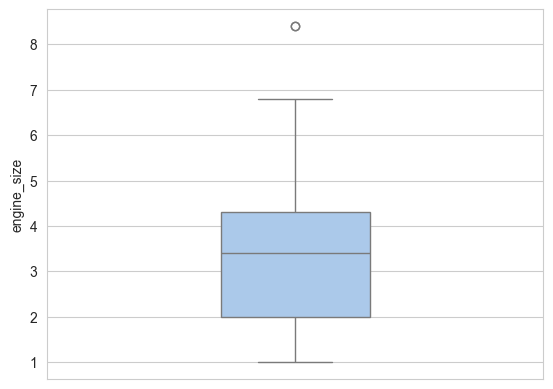

In [26]:
sns.boxplot(y="engine_size", data=df, width=0.3)

Possiamo notare un outlier nella dimensione del motore, c'è un outlier. Questa feature è misurata in litri e un valore come quello mostrato non dovrebbe allarmarci troppo: è più che plausibile.

In [27]:
sns.boxplot(y="cylinders", data=df, width=0.3)

<Axes: ylabel='cylinders'>

In [28]:
sns.boxplot(y="fuel_consumption_comb", data=df, width=0.3)

<Axes: ylabel='fuel_consumption_comb'>

Sembrano esserci diversi outlier sui consumi: questa feature è misurata in litri per 100 km, per cui anche qui, sebbene siano consumi leggermente elevati, sono valori leciti.

<Axes: ylabel='co2_emissions'>

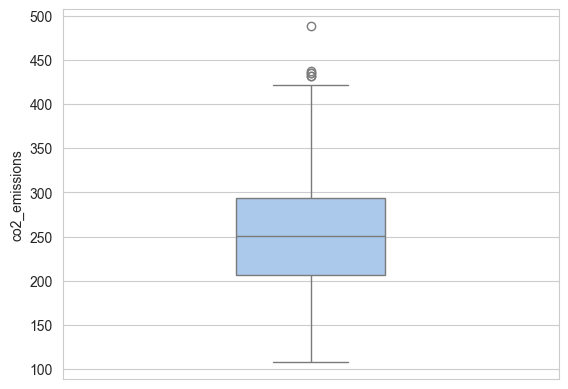

In [29]:
sns.boxplot(y="co2_emissions", data=df, width=0.3)

Sulle emissioni, che per noi sono la variabile dipendente da predire, ci sono degli outlier. Anche qui si tratta di valori comunque leciti e, come indicato prima, solo in casi di evidenti errori nei dati si procede alla cancellazione degli outlier sulla DV.

### 2.2 Train/test split

Procediamo con il metodo holdout per iniziare. Per la regressione lineare semplice, selezioniamo solamente la dimensione del motore.

In [30]:
df_red = df[['engine_size', 'co2_emissions']]

# separiamo IV e DV
X = df_red.iloc[:, :-1]
y = df_red.iloc[:, -1]

# applichiamo lo split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Di nuovo, non occorre il feature scaling in quanto stiamo lavorando con una regressione lineare.

## 2.3 Allenamento e predizioni

In [31]:
# creazione del regressore
regressor = LinearRegression()

# training
regressor.fit(X_train, y_train)

# predizioni sul test set
y_hat = regressor.predict(X_test)

# retta di regressione
print("Linear regression model: y = {}x + {}".format(regressor.coef_, regressor.intercept_))

Linear regression model: y = [39.24838431]x + 126.18920154724972


## 2.4 Prestazioni

Valutiamo le prestazioni:

(0.0, 507.0)

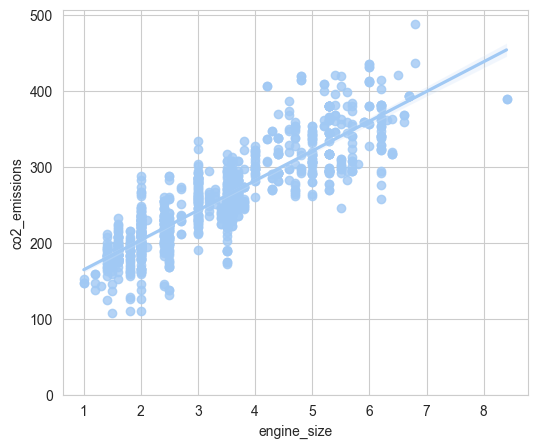

In [32]:
plt.figure(figsize=(6, 5))
sns.regplot(x="engine_size", y="co2_emissions", data=df_red)
plt.ylim(0, )

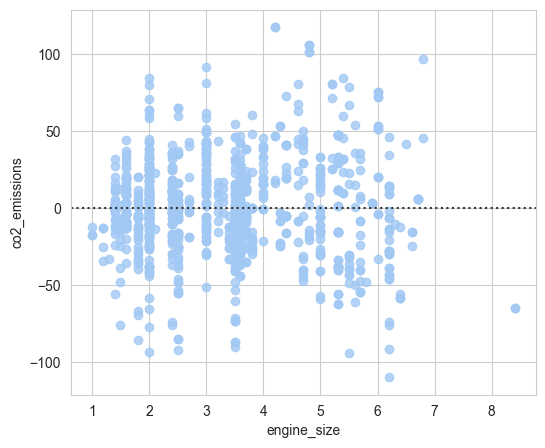

In [33]:
plt.figure(figsize=(6, 5))
sns.residplot(x=df_red['engine_size'], y=df_red['co2_emissions'])
plt.show()

In [34]:
mse = mean_squared_error(y_test, y_hat)
print('The mean square error of price and predicted value is: ', mse)

print('The root mean square error of price and predicted value is: ', math.sqrt(mse))

mae = mean_absolute_error(y_test, y_hat)
print('The mean absolute error of price and predicted value is: ', mae)

print('The R-square is: ', regressor.score(X_test, y_test))
print('The R-square is: ', r2_score(y_test, y_hat))

The mean square error of price and predicted value is:  1181.5288093035547
The root mean square error of price and predicted value is:  34.373373551392284
The mean absolute error of price and predicted value is:  25.568890456023563
The R-square is:  0.7201153918073577
The R-square is:  0.7201153918073577


Si tratta di un buon risultato per iniziare. In effetti, osservando le correlazioni nel dataset possiamo notare che questa feature è un buon predittore:

In [35]:
df.corr()

engine_size  cylinders  fuel_consumption_comb  \
engine_size               1.000000   0.934011               0.819482   
cylinders                 0.934011   1.000000               0.776788   
fuel_consumption_comb     0.819482   0.776788               1.000000   
co2_emissions             0.874154   0.849685               0.892129   

                       co2_emissions  
engine_size                 0.874154  
cylinders                   0.849685  
fuel_consumption_comb       0.892129  
co2_emissions               1.000000

Possiamo notare che anche le altre due feature che abbiamo conservato hanno una buona correlazione. Osserviamo il P-value

In [36]:
from scipy import stats

columns = df.columns[:-1]  # selezioniamo tutte le feature tranne il prezzo
for col in columns:
    pearson_coef, p_value = stats.pearsonr(df[col], df['co2_emissions'])
    print(f"[{col}]: corr = {pearson_coef} | p = {p_value}")

[engine_size]: corr = 0.8741543683958122 | p = 0.0
[cylinders]: corr = 0.8496845920141154 | p = 2.770937203979472e-298
[fuel_consumption_comb]: corr = 0.8921285933157542 | p = 0.0


## 2.5 k-fold cross-validation

Per avere una indicazione ancora più chiara, ricorriamo ad uno split con il metodo k-fold: questo ci garantirà di non avere ottenuto delle prestazioni dipendenti dallo split creato con holdout.

Questa volta, otterremo $k$ prestazioni, una per ogni split applicato nel metodo k-fold:
- importiamo la classe [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) da scikit-learn;
- creaimo sempre gli array X e y, prestando attenzione alla loro conversione in array NumPy per essere utilizzabili tramite gli indici ottenuti dallo split;
- creiamo un oggetto KFold, sul quale iteriamo per avere le prestazioni corrispondenti ad ogni split.

In [37]:
from sklearn.model_selection import KFold
import numpy as np

n_fold = 5
k_fold = KFold(n_splits=n_fold, random_state=0, shuffle=True)

X = df_red.iloc[:, :-1].to_numpy()
y = df_red.iloc[:, -1].to_numpy()

# inizializziamo delle liste per le metriche
mse = []
mae = []
r2 = []

for train_index , test_index in k_fold.split(X): # iterazione su tutti i fold con unpacking di train/test index
    X_train , X_test = X[train_index,:],X[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]

    # fit e predizioni come prima, ma sui fold correnti
    regressor.fit(X_train,y_train)
    y_hat = regressor.predict(X_test)

    # metriche calcolate come sempre
    mse.append(mean_squared_error(y_test, y_hat))
    mae.append(mean_absolute_error(y_test, y_hat))
    r2.append(r2_score(y_test, y_hat))
    
rmse = np.sqrt(np.array(mse))

Valutiamo le prestazioni:

In [38]:
print('Average MSE: ', np.mean(np.array(mse)))
print('Average RMSE: ', np.mean(np.array(rmse)))
print('Average MAE: ', np.mean(np.array(mae)))
print('Average R-squared: ', np.mean(np.array(r2)))

Average MSE:  952.9889458153887
Average RMSE:  30.816340224159813
Average MAE:  23.40133591480756
Average R-squared:  0.7619043147090637


Se siamo soddisfatti delle prestazioni, alleniamo il modello su tutto il dataset a disposizione e abbiamo il tool per fare le predizioni:

In [39]:
regressor.fit(X, y)
new_data = np.array([[0.4, 0.5, 1.4]]).T  # ci viene chiesto un vettore colonna
print(regressor.predict(new_data))

[140.95417941 144.86669939 180.0793792 ]


***
# 3 Regressione lineare multipla

Come visto poco fa, abbiamo altre due feature nel dataset ridotto con una correlazione forte di grande rilevanza statistica (dato il P-value). Inseriamole nel nostro modello ricorrendo alla regressione lineare multipla.

L'obiettivo è quello di trovare il miglior iper-piano che risolve l'equazione MSE:

$\widehat{y} = \beta_0 + \sum_{i=1}^N \beta_ix_i = \boldsymbol{\beta}^T\mathbf{x}$

Per semplicità, proviamo prima con un holdout:

In [40]:
# separiamo IV e DV
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# applichiamo lo split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Addestriamo la rete sul training set:

In [41]:
# creazione del regressore
regressor = LinearRegression()

# training
regressor.fit(X_train, y_train)

LinearRegression()

Prediciamo sul test set:

In [42]:
# predizioni sul test set
y_hat = regressor.predict(X_test)

Osserviamo i coefficienti:

In [43]:
print("Linear regression model:\n\tcoefficients: {}\n\tintercept: {}".format(regressor.coef_, regressor.intercept_))

Linear regression model:
	coefficients: [11.98993058  7.54469599  8.98695981]
	intercept: 69.052209925538


Prestazioni:

In [44]:
mse = mean_squared_error(y_test, y_hat)
print('The mean square error of price and predicted value is: ', mse)

print('The root mean square error of price and predicted value is: ', math.sqrt(mse))

mae = mean_absolute_error(y_test, y_hat)
print('The mean absolute error of price and predicted value is: ', mae)

print('The R-square is: ', regressor.score(X_test, y_test))
print('The R-square is: ', r2_score(y_test, y_hat))

The mean square error of price and predicted value is:  589.2351940837906
The root mean square error of price and predicted value is:  24.274167217101198
The mean absolute error of price and predicted value is:  18.016270102501476
The R-square is:  0.8604199405627129
The R-square is:  0.8604199405627129


Le prestazioni sono nettamente migliori!! Accertiamoci che non sia legato allo split con un k-fold:

In [45]:
n_fold = 5
k_fold = KFold(n_splits=n_fold, random_state=0, shuffle=True)

X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()

# inizializziamo delle liste per le metriche
mse = []
mae = []
r2 = []

for train_index , test_index in k_fold.split(X): # iterazione su tutti i fold con unpacking di train/test index
    X_train , X_test = X[train_index,:],X[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]

    # fit e predizioni come prima, ma sui fold correnti
    regressor.fit(X_train,y_train)
    y_hat = regressor.predict(X_test)

    # metriche calcolate come sempre
    mse.append(mean_squared_error(y_test, y_hat))
    mae.append(mean_absolute_error(y_test, y_hat))
    r2.append(r2_score(y_test, y_hat))
    
rmse = np.sqrt(np.array(mse))

Valutiamo le prestazioni medie:

In [46]:
print('Average MSE: ', np.mean(np.array(mse)))
print('Average RMSE: ', np.mean(np.array(rmse)))
print('Average MAE: ', np.mean(np.array(mae)))
print('Average R-squared: ', np.mean(np.array(r2)))

Average MSE:  554.0661111242952
Average RMSE:  23.511539353036994
Average MAE:  17.042637420758247
Average R-squared:  0.8615069426879233


Poiché abbiamo aggiunto delle feature, il miglioramento potrebbe essere legato ad un artificio matematico e non ad un effettivo miglioramento delle predizioni. Calcoliamo il valore di $\overline{R}^2$:

In [47]:
n = df.shape[0]
p = X.shape[1]
r2_adj = 1-(1-np.mean(np.array(r2)))*(n-1)/(n-p-1)
r2_adj

0.861116087399178

Effettivamente $\overline{R}^2\leq R^2$ come deve essere, ma estremamente vicino. Abbiamo davvero migliorato le prestazioni in modo significativo aggiungendo delle feature con elevata correlazione e basso P-value.

***
# 4 Regressione polinomiale

## 4.1 Semplice

Nella regressione polinomiale, la relazione tra IV e DV è rappresentata da un polinomio di grado $N$:

$\widehat{y} = \beta_0 + \sum_{i=1}^N \beta_ix^{i} = \boldsymbol{\beta}^T\mathbf{x}$

Per implementarlo in Python, ricorriamo sempre ad un regressore lineare. Tuttavia, trasformiamo la IV da utilizzare tramite la classe [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) del modulo sklearn.preprocessing in modo da renderla una regressione polinomiale:


In [48]:
from sklearn.preprocessing import PolynomialFeatures

df_red = df[['engine_size', 'co2_emissions']]

# separiamo IV e DV
X = df_red.iloc[:, :-1]
y = df_red.iloc[:, -1]

# creiamo un trasformatore polinomiale
pr = PolynomialFeatures(degree = 4)

# applichiamo lo split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Chiamiamo il metodo fit_transform() sul training set:

In [49]:
X_train_poly = pr.fit_transform(X_train)

Applichiamo la regressione. Si deve prestare attenzione al fatto che ora la IV del test set va solo trasformata, non fittata, tramite l'oggetto PolynomialFeatures: 

In [50]:
# creazione del regressore
regressor = LinearRegression()

# training
regressor.fit(X_train_poly, y_train)

# predizioni sul test set
X_test_poly = pr.transform(X_test)
y_hat = regressor.predict(X_test_poly)

In [51]:
mse = mean_squared_error(y_test, y_hat)
print('The mean square error of price and predicted value is: ', mse)

print('The root mean square error of price and predicted value is: ', math.sqrt(mse))

mae = mean_absolute_error(y_test, y_hat)
print('The mean absolute error of price and predicted value is: ', mae)

print('The R-square is: ', regressor.score(X_test_poly, y_test))
print('The R-square is: ', r2_score(y_test, y_hat))

The mean square error of price and predicted value is:  1177.1376316735268
The root mean square error of price and predicted value is:  34.309439396083505
The mean absolute error of price and predicted value is:  25.512880296909334
The R-square is:  0.7211555890677267
The R-square is:  0.7211555890677267


Non sembrerebbe che abbiamo ottenuto un vantaggio. Chiaramente, si dovrebbero testare altri valori dell'esponente per avere un'analisi completa.

## 4.2 Multipla

Per ottenere una regressione polinomiale multipla, si procedere in modo del tutto equivalente, semplicemente prendendo tutte le feature a disposizione: 

In [52]:
# separiamo IV e DV
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# creiamo un trasformatore polinomiale
pr = PolynomialFeatures(degree = 4)

# applichiamo lo split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train_poly = pr.fit_transform(X_train)

# creazione del regressore
regressor = LinearRegression()

# training
regressor.fit(X_train_poly, y_train)

# predizioni sul test set
X_test_poly = pr.transform(X_test)
y_hat = regressor.predict(X_test_poly)

mse = mean_squared_error(y_test, y_hat)
print('The mean square error of price and predicted value is: ', mse)

print('The root mean square error of price and predicted value is: ', math.sqrt(mse))

mae = mean_absolute_error(y_test, y_hat)
print('The mean absolute error of price and predicted value is: ', mae)

print('The R-square is: ', regressor.score(X_test_poly, y_test))
print('The R-square is: ', r2_score(y_test, y_hat))

The mean square error of price and predicted value is:  279.26903769639625
The root mean square error of price and predicted value is:  16.711344580745028
The mean absolute error of price and predicted value is:  8.313242171604514
The R-square is:  0.9338457898101825
The R-square is:  0.9338457898101825


C'è un netto milgioramento delle prestazioni, che andrebbe sicuramente valutato con un metodo k-fold anche in questo caso. Tuttavia, date le premesse viste sopra con la regressione lineare, possiamo immaginare che abbiamo ottenuto davvero un modello ancora più valido.